In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from pathlib import Path

In [2]:
HISTORY_DIR = Path('../results/tuning/')
filenames = (
    '3_4W_imu_2024-05-28-19-05-17',
    '3_6W_imu_2024-05-28-20-40-28',
    '3_4W_6W_imu_2024-05-28-18-34-16',
    '3_4W_servo_2024-06-03-16-30-49',
    '3_6W_servo_2024-06-03-17-12-39',
    '3_4W_6W_servo_2024-06-03-18-31-33',
    '3_4W_imu_servo_2024-05-28-19-35-07',
    '3_6W_imu_servo_2024-05-28-20-10-03',
    '3_4W_6W_imu_servo_2024-05-28-11-54-14',
)
labels = ('IMU', 'POWER', 'IMU + POWER')

t_95 = 2.228

In [3]:
results = {}
for filename in filenames:
    with open(HISTORY_DIR / (filename + '.json')) as fp:
        results[filename] = json.load(fp)

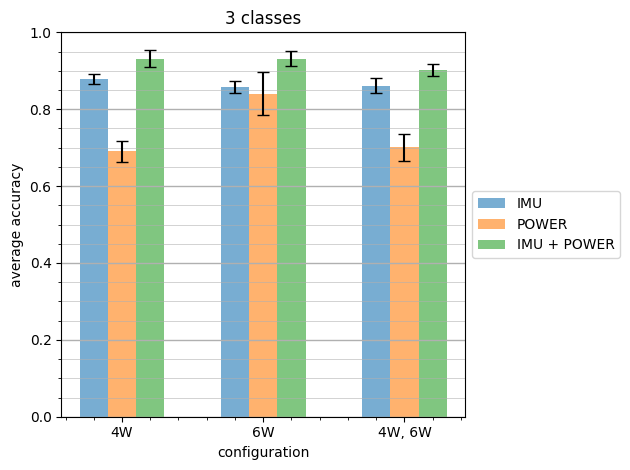

In [4]:
fig, ax = plt.subplots()

average_acc, ci_acc = [], []
for result in results.values():
    df = pd.DataFrame(result)
    res_array = np.array(df.loc['accuracy'].values.tolist()).T
    average_acc.append(res_array.mean())
    ci_acc.append(t_95 * res_array.std() / np.sqrt(10))
    
i = 0
ind = np.arange(len(average_acc) / len(labels)) # the x locations for the groups
ind_copy = ind.copy()
width = 0.2 # the width of the bars
for label in labels:
    ax.bar(ind, average_acc[i:i+3], width, yerr=ci_acc[i:i+3], label=label, capsize=4, alpha=0.6)
    i += 3
    ind += width

ax.set_xticks(ind_copy + width, labels=['4W', '6W', '4W, 6W'])
ax.set_ylim(0, 1)
ax.set_xlabel('configuration')
ax.set_ylabel('average accuracy')
ax.set_title('3 classes')
plt.grid(which='major', axis='y', linewidth=1)
plt.grid(which='minor', axis='y', linewidth=0.4)
plt.minorticks_on()
plt.legend(bbox_to_anchor=(1, 0.5), loc='center left',)
fig.tight_layout()

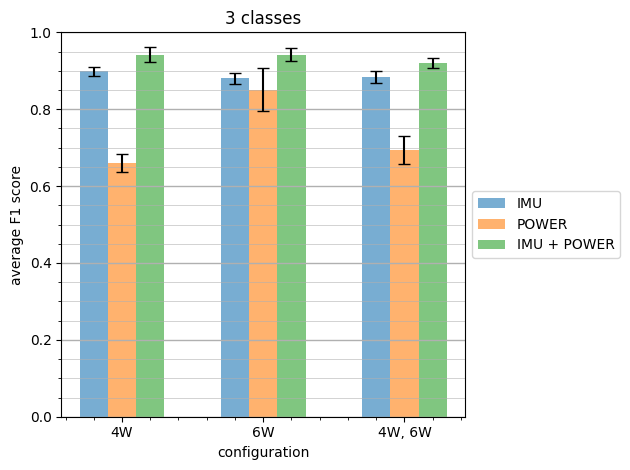

In [5]:
fig, ax = plt.subplots()

average_f1, ci_f1 = [], []
for result in results.values():
    df = pd.DataFrame(result)
    res_array = np.array(df.loc['f1_score'].values.tolist()).T
    average_f1.append(res_array.mean())
    ci_f1.append(t_95 * res_array.std() / np.sqrt(10))
    
i = 0
ind = np.arange(len(average_f1) / len(labels)) # the x locations for the groups
width = 0.2 # the width of the bars
for label in labels:
    ax.bar(ind, average_f1[i:i+3], width, yerr=ci_f1[i:i+3], label=label, capsize=4, alpha=0.6)
    i += 3
    ind += width

ax.set_xticks(ind_copy + width, labels=['4W', '6W', '4W, 6W'])
ax.set_ylim(0, 1)
ax.set_xlabel('configuration')
ax.set_ylabel('average F1 score')
ax.set_title('3 classes')
plt.grid(which='major', axis='y', linewidth=1)
plt.grid(which='minor', axis='y', linewidth=0.4)
plt.minorticks_on()
plt.legend(bbox_to_anchor=(1, 0.5), loc='center left',)
fig.tight_layout()